<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/Marketing_mix_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Import the appropriate Python libraries.
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load the CSV file into a dataframe.
df_marketing_mix = pd.read_csv('https://raw.githubusercontent.com/codymbaldwin/sample-files/master/ad_spend.csv')

In [3]:
# Dimensions of the dataset.
df_marketing_mix.shape

(200, 4)

In [4]:
# List all fields and their data types.
df_marketing_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Preview the first few records of data.
df_marketing_mix.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Divide advertising cost columns by 100 to convert to millions dollars.
df_marketing_mix['TV'] = df_marketing_mix['TV'] / 100
df_marketing_mix['radio'] = df_marketing_mix['radio'] / 100
df_marketing_mix['newspaper'] = df_marketing_mix['newspaper'] / 100



In [8]:
# Preview the first 8 records of data.
df_marketing_mix.head((8))

,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9
5,0.087,0.489,0.750,7.2
6,0.575,0.328,0.235,11.8
7,1.202,0.196,0.116,13.2


In [9]:
# Generate descriptive stats.
df_marketing_mix.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,1.47,0.23,0.31,14.02
std,0.86,0.15,0.22,5.22
min,0.01,0.00,0.00,1.60
25%,0.74,0.10,0.13,10.38
50%,1.50,0.23,0.26,12.90
75%,2.19,0.37,0.45,17.40
max,2.96,0.50,1.14,27.00


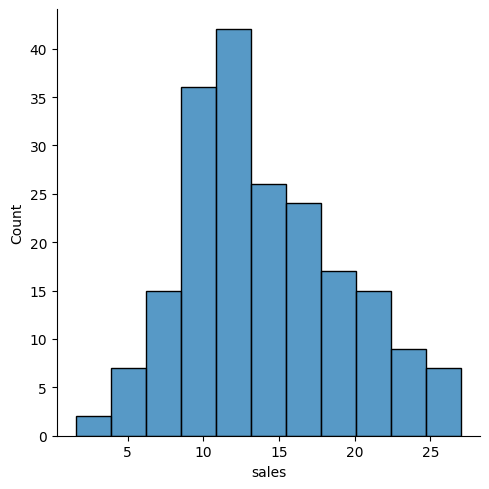

In [10]:
# Show the distribution of healthcare_company.
sns.displot(df_marketing_mix, x= "sales")


In [11]:
# Add a new column "total_ad_spend" that sums the "TV", "radio", and "newspaper" columns
df_marketing_mix['total_ad_spend'] = df_marketing_mix['TV'] + df_marketing_mix['radio'] + df_marketing_mix['newspaper']



In [13]:
# Calculate ROI percentage and create a new column "roi_percent"
df_marketing_mix['roi_percent'] = (df_marketing_mix['sales'] - df_marketing_mix['total_ad_spend']) / df_marketing_mix['total_ad_spend'] *100

In [14]:
# Display the DataFrame with the new column
df_marketing_mix.head()


,TV,radio,newspaper,sales,total_ad_spend,roi_percent
0,2.301,0.378,0.692,22.1,3.371,555.591813
1,0.445,0.393,0.451,10.4,1.289,706.826998
2,0.172,0.459,0.693,9.3,1.324,602.416918
3,1.515,0.413,0.585,18.5,2.513,636.171906
4,1.808,0.108,0.584,12.9,2.500,416.000000


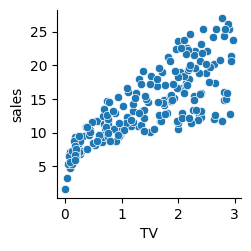

In [15]:
# Show the relationship between TV advertising spend and sales. (We omit the radio, newspaper, total_ad_spend and roi_percent)
sns.pairplot(df_marketing_mix, x_vars=['TV'], y_vars='sales')# This results in too many data points.



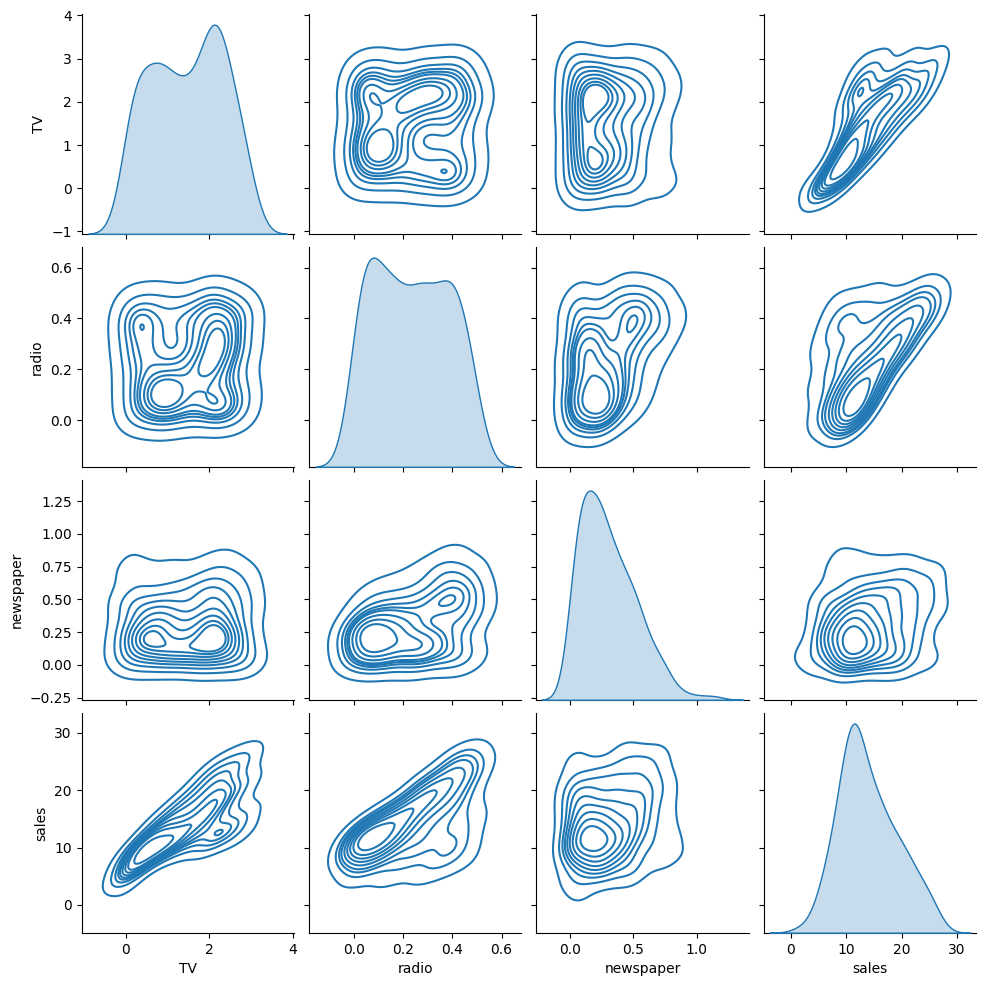

In [16]:
# Show the relationships between all of the fields.(We omit total_ad_spend and roi_percent).
sns.pairplot(df_marketing_mix, vars=['TV','radio','newspaper','sales'], kind="kde");

In [17]:
# Show the correlation (r) between variables.
df_marketing_mix.corr()

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
TV,1.000000,0.054809,0.056648,0.782224,0.945330,-0.557013
radio,0.054809,1.000000,0.354104,0.576223,0.293211,-0.016154
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059,-0.310481
sales,0.782224,0.576223,0.228299,1.000000,0.867712,-0.338714
total_ad_spend,0.945330,0.293211,0.343059,0.867712,1.000000,-0.589595
roi_percent,-0.557013,-0.016154,-0.310481,-0.338714,-0.589595,1.000000


In [ ]:
# Drop rows with null values.
df_marketing_mix.dropna(inplace=True)


In [18]:
# Separate dependent (y) and independent (x) variables
x = df_marketing_mix[['TV', 'radio', 'newspaper']] # With all variables
y = df_marketing_mix['sales']

In [19]:
# Split the data into a training set (75% of data) and test set (25% of data)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

In [20]:
# Train the prediction model using the training data.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Coefficient for the "radio" variable.
radio_coefficient=model.coef_[x.columns.get_loc('radio')]
print(radio_coefficient.round(3))


19.9


In [22]:
# Display the y-intercept and coefficients of our regression model.
# y = b + mx
print(model.intercept_.round(3))

2.893


In [23]:
# Predict sales for a specific condition.
new_TV = 0.5  # Replace with the TV advertising spend
new_radio = 0.5 # Replace with the radio advertising spend
newspaper = 0.34 #Keeping newspaper advertising the same.
new_x =pd.DataFrame([[new_TV, new_radio, newspaper]], columns=['TV', 'radio', 'newspaper'])
  # Create a 2D array with one row and two columns representing the three features
predicted_sales = model.predict(new_x).round(3)  # Predict sales and round to 3 decimal places
print(predicted_sales)

[15.09]


In [24]:
# Make predictions in the test data.
y_pred = model.predict(x_test.values)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# Evaluate the performance of the model (r-squared).
r2 = metrics.r2_score(y_test, y_pred)  # Calculate R-squared
rounded_r2 = round(r2, 3)  # Round R-squared to 3 decimal places
print(rounded_r2)  # Print the rounded R-squared

0.858
